# 🚢 Titanic Survival Prediction - Exploratory Data Analysis (EDA)

This notebook performs **data cleaning** and **exploratory data analysis (EDA)** on the Titanic dataset.
We aim to:
- Understand the data structure
- Handle missing values
- Explore relationships between features and survival
- Detect patterns that could help in predictive modeling

**Dataset:** `train.csv` from the Titanic Kaggle competition


In [ ]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Configure plots
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

#Loading dataset
df = pd.read_csv("train.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##Dataset Structure and Summary

- `.info()` → column types & non-null counts  
- `.describe()` → statistical summary of numerical features  
- `.describe(include=['object'])` → summary of categorical features


In [ ]:
df.info()
df.describe()
df.describe(include=['object'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,G6,S
freq,1,577,7,4,644


##Missing Values Analysis

We check for missing values:
1. Count missing values per column
2. Sort in descending order
3. Visualize using a heatmap
4. Handle missing values


In [ ]:
# Check missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
missing_values

,0
Cabin,687
Age,177
Embarked,2


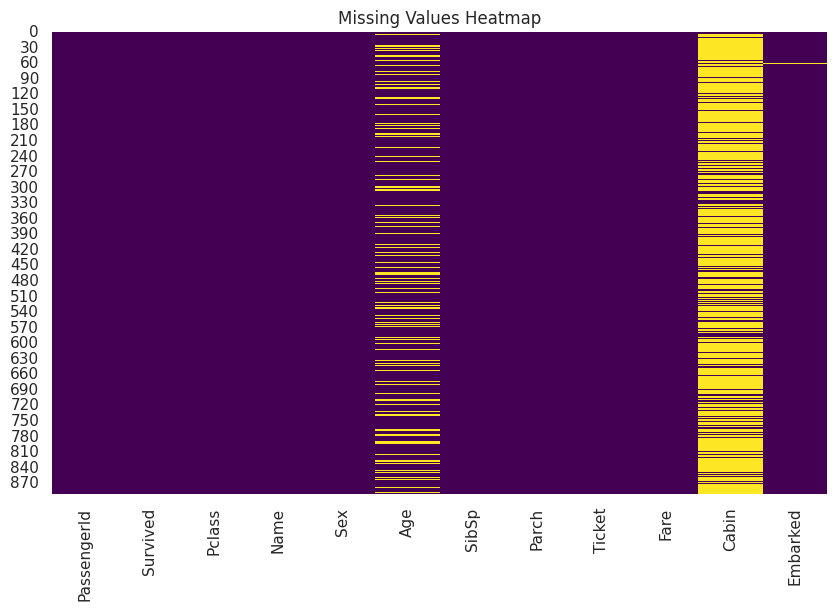

In [ ]:
# Visualize missing values
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

 Missing Values Heatmap

Observation:

    Cabin has a large number of missing values.

    Age has some missing values.

    Embarked has very few missing values.

In [ ]:
# Fill missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop 'Cabin' and irrelevant columns
df.drop(['Cabin', 'PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

df.head()

/tmp/ipython-input-771548778.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-771548778.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


##Survival Distribution

We check:
- Count of survivors vs non-survivors
- Percentage distribution
- Bar chart visualization


In [ ]:
df['Survived'].value_counts()

,count
Survived,
0,549
1,342


In [ ]:
# Percentage distribution
df['Survived'].value_counts(normalize=True) * 100

,proportion
Survived,
0,61.616162
1,38.383838


/tmp/ipython-input-690598797.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=df, palette='coolwarm')


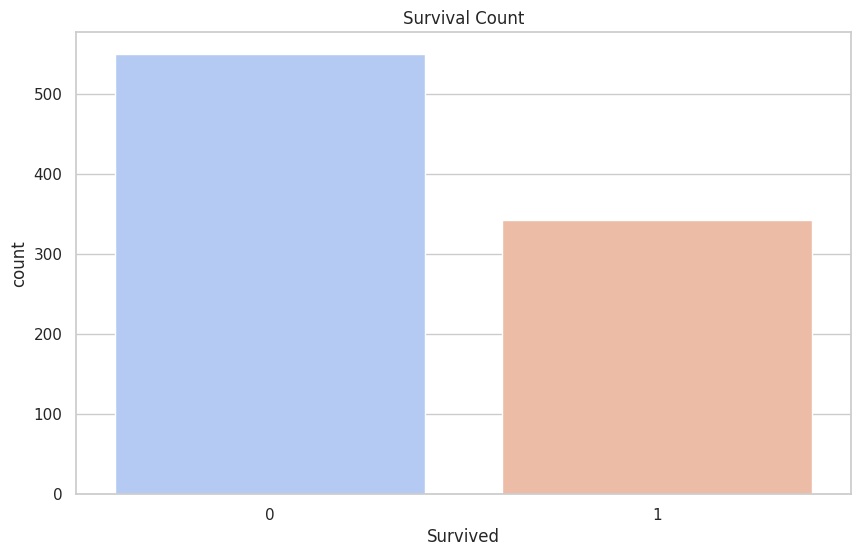

In [ ]:
sns.countplot(x='Survived', data=df, palette='coolwarm')
plt.title("Survival Count")
plt.show()


Survival Count

Observation:

    Around 38% of passengers survived, while 62% did not survive.

    There is a significant imbalance between survival and non-survival counts.

##Distribution of Numerical Features

Histograms help visualize the spread and skewness of numerical variables like Age, Fare, etc.


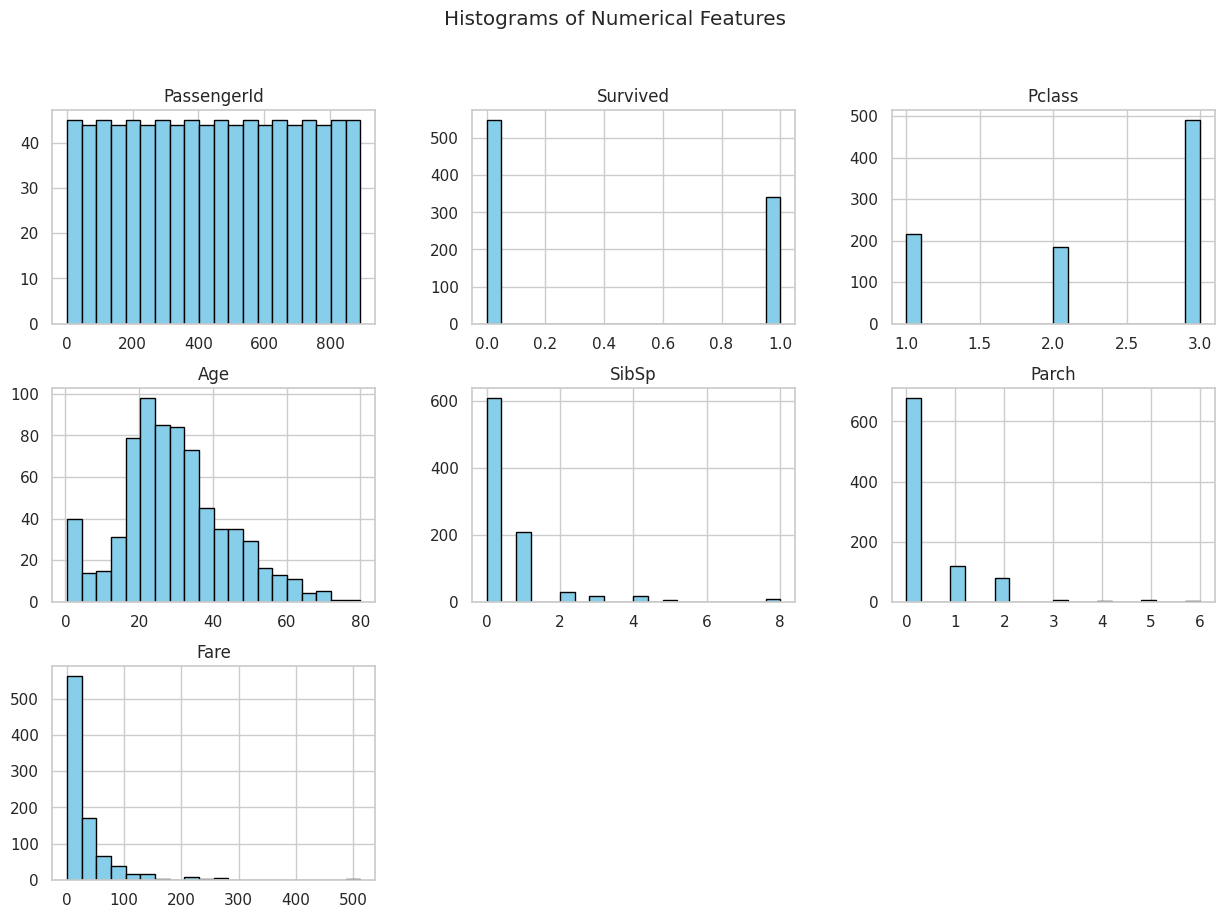

In [ ]:
df.hist(bins=20, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Numerical Features")
plt.show()

Histograms of Numerical Features

Observation:

    Age distribution is right-skewed, with most passengers between 20–40 years.

    Fare distribution is highly right-skewed, with a few very high fares.

    Passenger class (Pclass) shows that more people traveled in 3rd class.

##Age Distribution by Survival

A boxplot is used to compare the age distribution of survivors vs non-survivors.


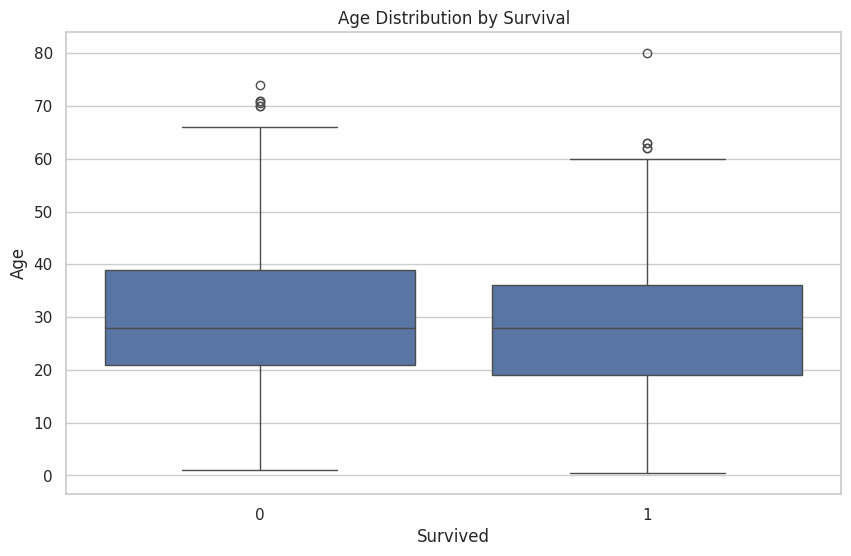

In [ ]:
sns.boxplot(x='Survived', y='Age', data=df)
plt.title("Age Distribution by Survival")
plt.show()


Age Distribution by Survival (Boxplot)

Observation:

    Median age of survivors is slightly lower than non-survivors.

    Survivors tend to have a wider range in younger ages, while older passengers were less likely to survive.

##Survival by Gender

Countplot shows how survival rates differ between males and females.


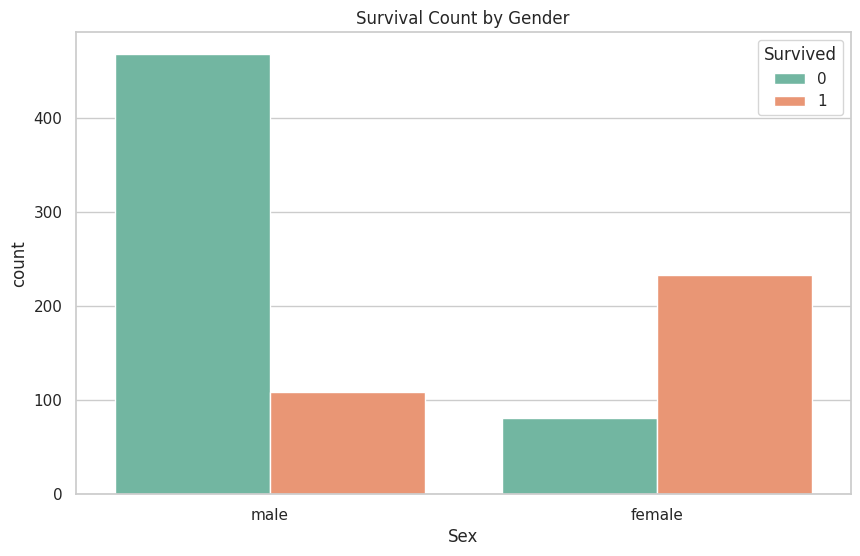

In [ ]:
sns.countplot(x='Sex', hue='Survived', data=df, palette='Set2')
plt.title("Survival Count by Gender")
plt.show()

Survival Count by Gender

Observation:

    Female passengers had a much higher survival rate compared to males.

    Most males did not survive.

##Survival by Passenger Class

Visualizing survival rates across passenger classes (Pclass).


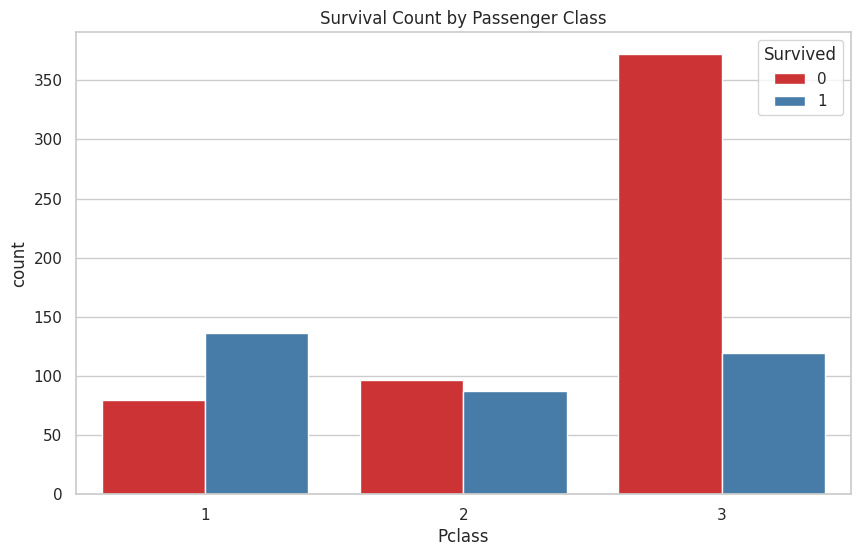

In [ ]:
sns.countplot(x='Pclass', hue='Survived', data=df, palette='Set1')
plt.title("Survival Count by Passenger Class")
plt.show()

Survival Count by Passenger Class

Observation:

    Higher survival rates are seen in 1st class passengers.

    3rd class passengers had the lowest survival rate.

##Survival by Embarked Port

We examine survival rates across ports of embarkation (C, Q, S).


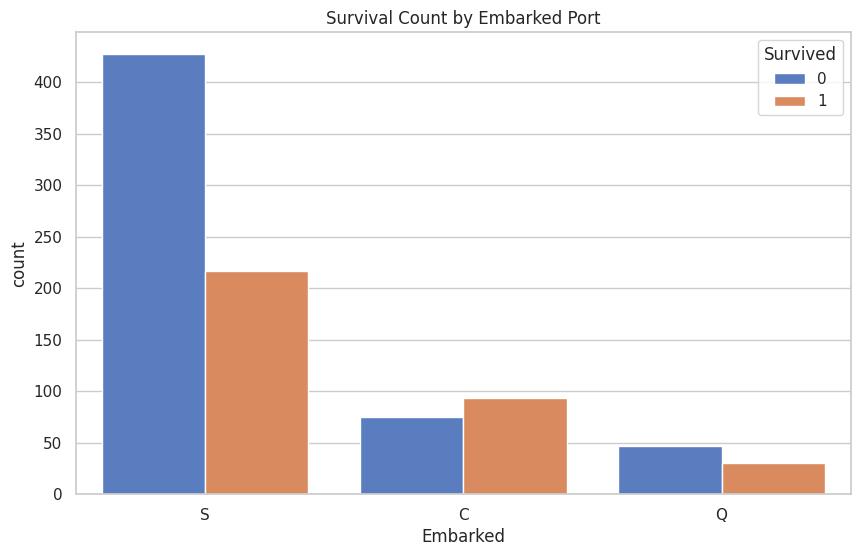

In [ ]:
# Survival by Embarked
sns.countplot(x='Embarked', hue='Survived', data=df, palette='muted')
plt.title("Survival Count by Embarked Port")
plt.show()


Survival Count by Embarked Port

Observation:

    Passengers from port C had the highest survival rate.

    Port S had the highest number of passengers but a lower survival rate.

##Pairplot for Numerical Features

A pairplot is used to visualize pairwise relationships between numerical variables, helping to identify patterns, correlations, and distributions.


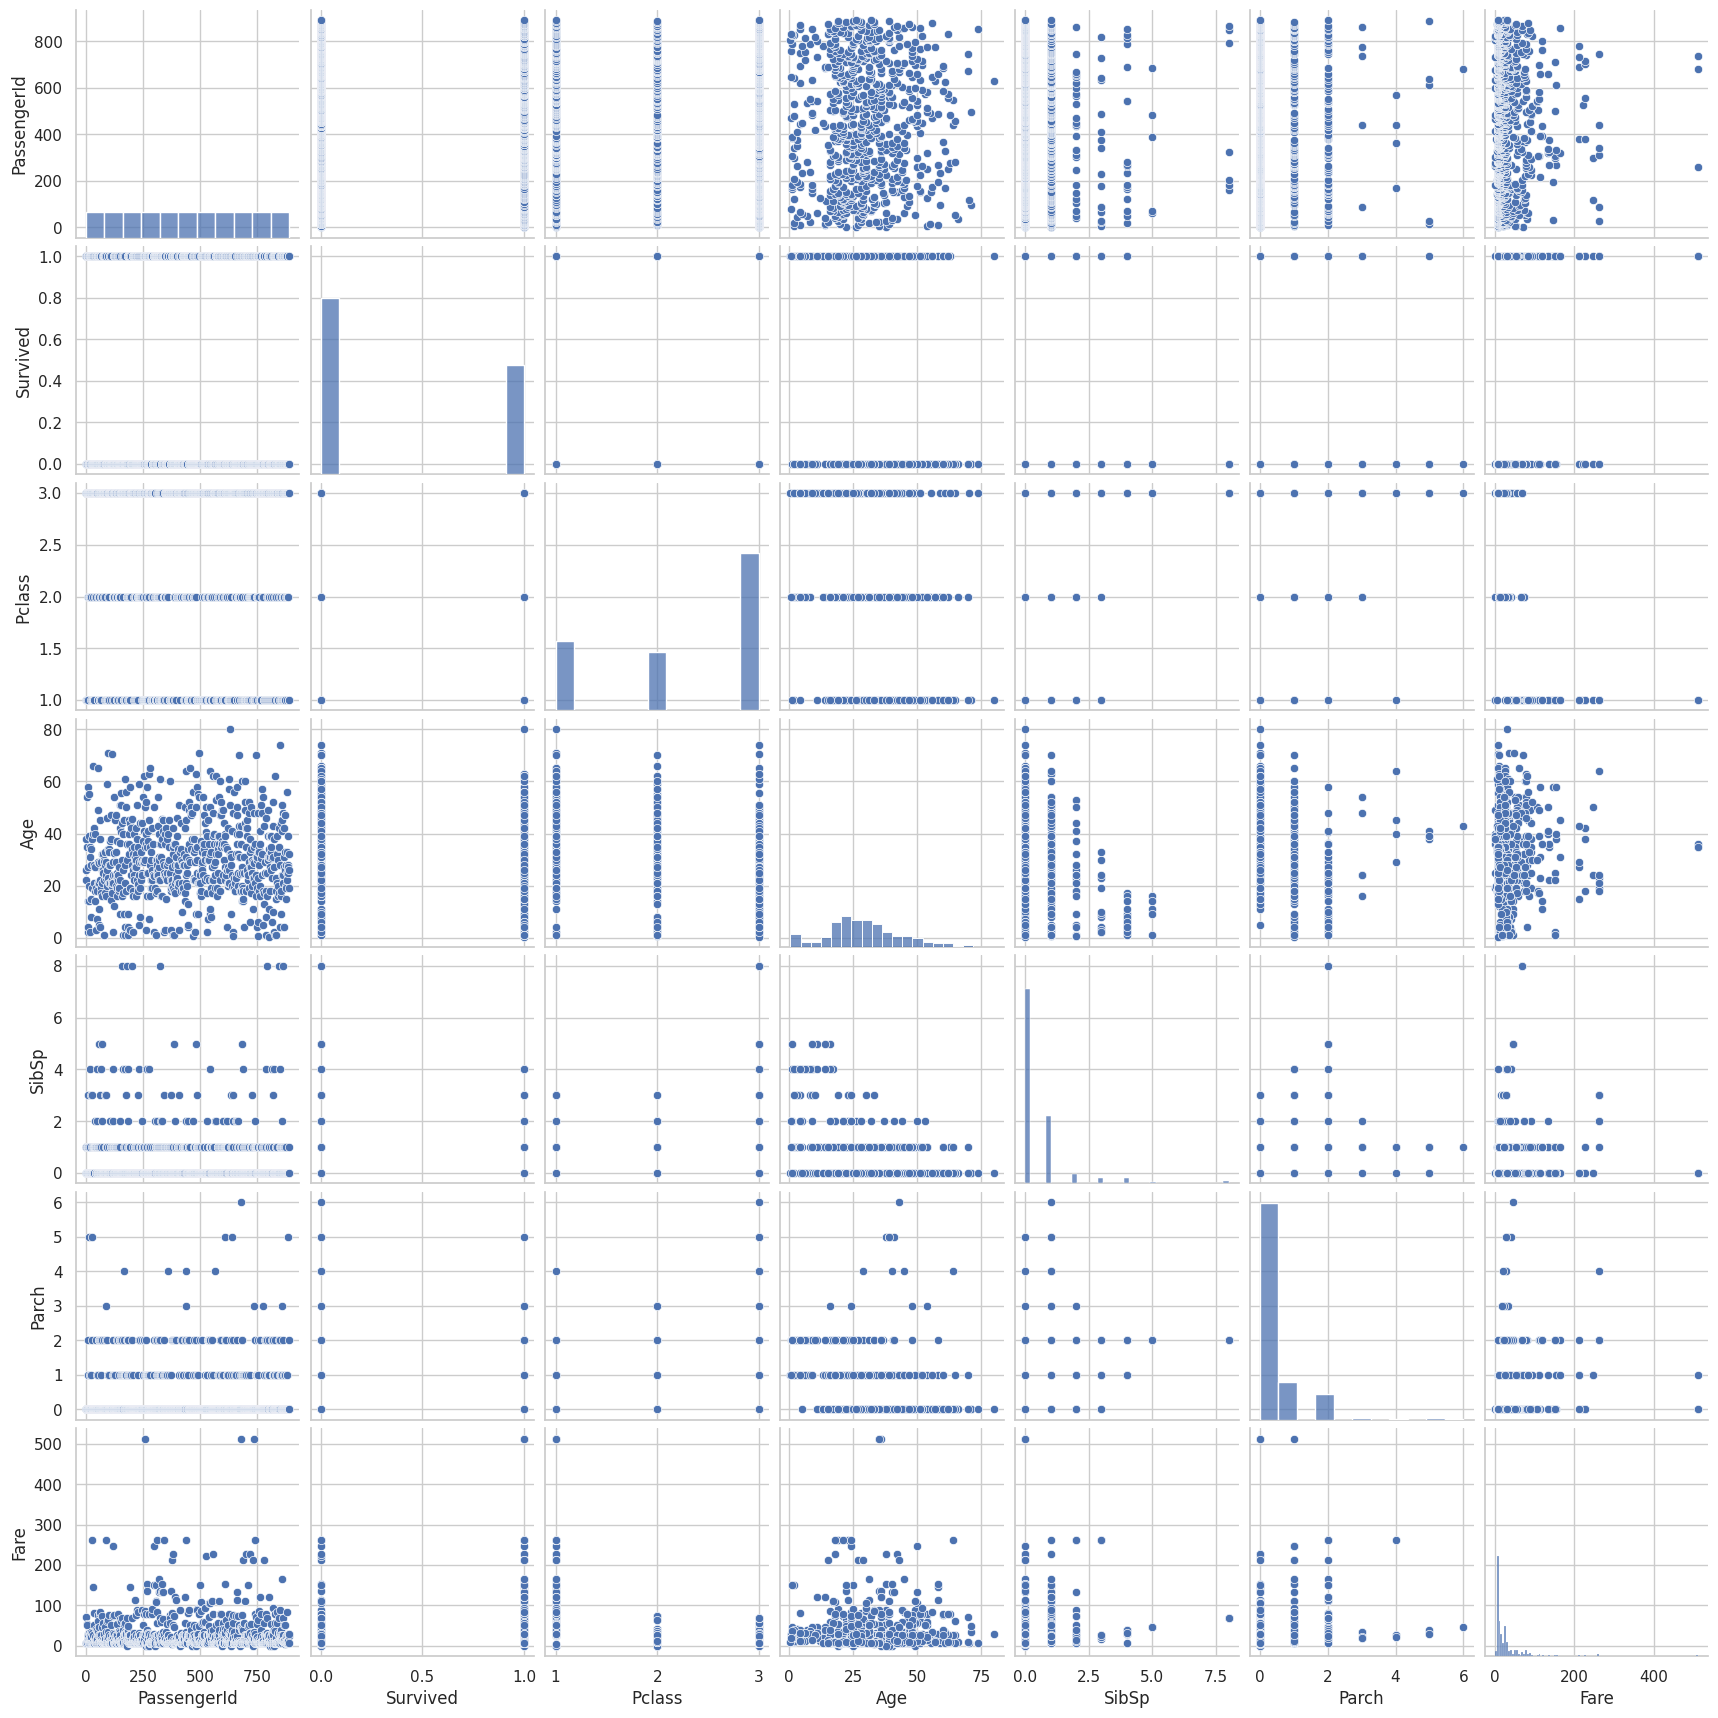

In [ ]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])  # only numbers
sns.pairplot(numeric_df)
plt.show()

Pairplot of Key Features (Survived, Pclass, Age, Fare, Sex)

Observation:

    Fare is strongly associated with survival, especially in higher classes.

    Female passengers, younger age groups, and higher-class tickets correlate with higher survival.

##Pairplot of Numerical Features

We plot pairwise relationships between numerical features to explore correlations.


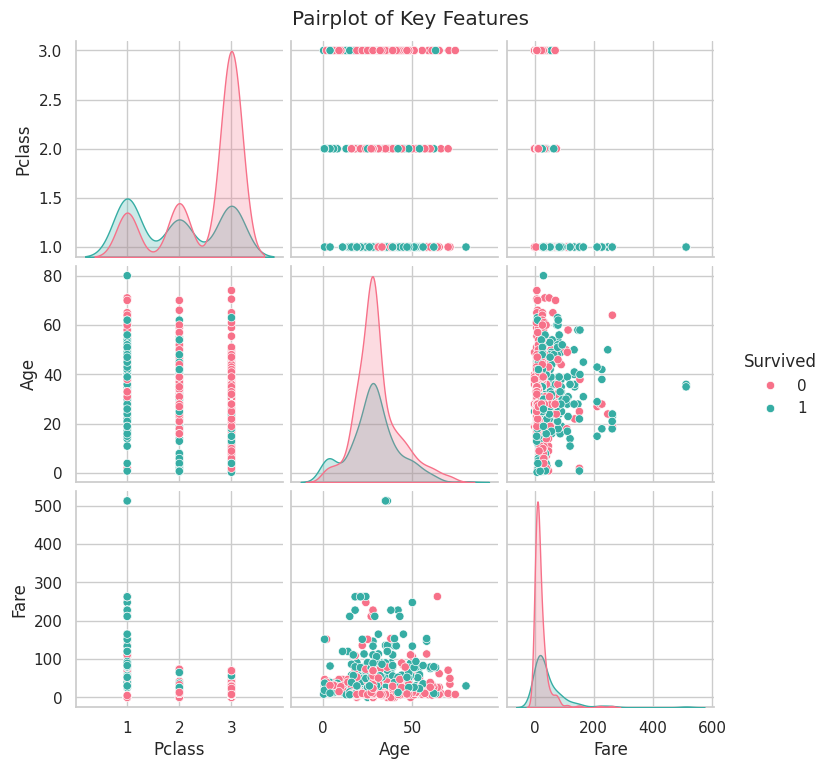

In [ ]:
sns.pairplot(df[['Survived', 'Pclass', 'Age', 'Fare']], hue='Survived', palette='husl')
plt.suptitle("Pairplot of Key Features", y=1.02)
plt.show()


Pairplot of Numerical Features (numeric_df)

Observation:

    Fare and Pclass show a clear inverse relationship — higher class = higher fare.

    Survivors tend to have higher fares and lower Pclass values (better class).

##Outlier Detection for Fare

A boxplot is used to detect extreme values in the `Fare` variable.


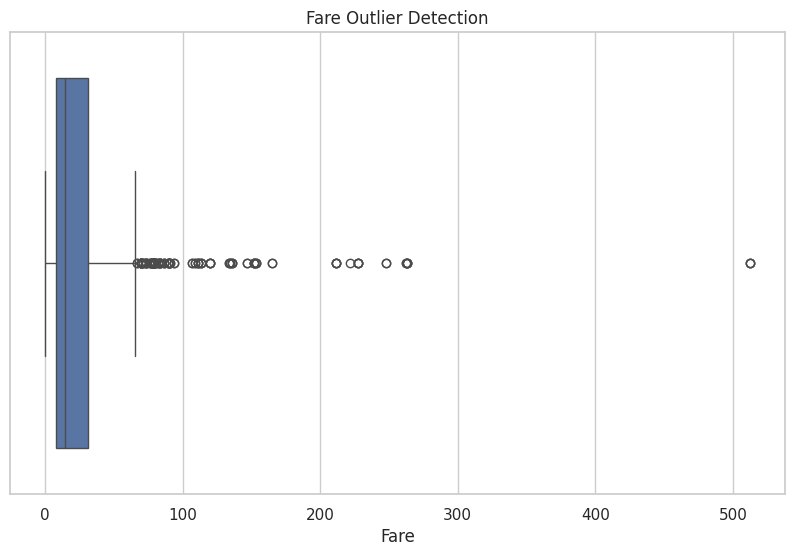

In [ ]:
sns.boxplot(x=df['Fare'])
plt.title("Fare Outlier Detection")
plt.show()


Outlier Detection for Fare

Observation:

    The Fare variable has several high-value outliers far above the median.

    These likely represent passengers traveling in luxury first-class cabins with extremely high ticket prices.

## **Final Insights Summary – Titanic EDA**

### **1. Dataset Overview**

* The Titanic dataset contains **891 passenger records** with **12 variables** in the training set.
* Variables include both numerical (Age, Fare, Pclass, SibSp, Parch) and categorical features (Sex, Embarked, Survived, etc.).

---

### **2. Key Findings**

* **Survival Rate:** Around **38% survived** and **62% did not survive**.
* **Gender Impact:** Females had a significantly higher survival rate (\~74%) compared to males (\~19%).
* **Passenger Class:** Higher classes had better survival rates:

  * Pclass 1 → \~63% survival
  * Pclass 2 → \~47% survival
  * Pclass 3 → \~24% survival
* **Age Factor:** Median age of survivors was lower; children and young adults had better chances of survival.
* **Embarked Port:** Passengers from **Cherbourg (C)** had the highest survival rate, followed by Queenstown (Q), and Southampton (S).
* **Fare Influence:** Higher ticket fares were associated with higher survival probability.

---

### **3. Data Quality Observations**

* **Missing Values:**

  * Age (\~19%) → filled with median value.
  * Embarked (0.2%) → filled with most frequent value.
  * Cabin (\~77%) → dropped due to high missing rate.
* **Outliers:** Fare column contains high-value outliers, mostly in first-class passengers.

---

### **4. Business/Analysis Implications**

* In rescue situations, **priority should be given to vulnerable groups** (women, children) — matches historical accounts.
* Ticket price and class strongly indicate survival — can reflect social inequality during evacuation.
* Port of embarkation may be linked to demographics or location of cabins.

---

### **5. Recommendations for Future Modeling**

* Convert categorical variables (Sex, Embarked) into numerical encodings for ML models.
* Create engineered features:

  * **FamilySize** = SibSp + Parch + 1
  * **Title** from passenger names.
* Handle outliers in Fare to prevent skewness in model training.